# Connecting to the RCC

If you don't want to work locally on your laptop, you can connect via ssh to the RCC to use the commandline, or via ThinLinc to use an ipython notebook:

https://rcc.uchicago.edu/docs/tutorials/msca/

```module avail``` will show you the list of RCC "modules" (not to be confused with python modules) that can be loaded.
```module load python/2.7-2015q1``` will make python available.  You'll also need to run ```module load node/0.10.29``` for notebook conversion, which we'll do at the end.
```ipython notebook``` will start you an ipython notebook.

# Importing Modules

A python script always begins with importing modules, like the ```library``` function in R.  There are various ways to do this in python.

In [1]:
import numpy # this is an import

All objects available through the ```numpy``` module are now available as ```numpy.```, like ```numpy.array```.

In [2]:
numpy.array([[1,2], [3,4]])

array([[1, 2],
       [3, 4]])

In [3]:
import numpy as np
import pandas as pd

/Users/civisemployee/anaconda3/envs/civis/lib/python3.4/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


All object are available as ```np.```, like ```np.array``` or ```pd.DataFrame```.  This will be our preferred method for these two specifically.

In [4]:
from numpy import array

This only imports individual functions or objects that you care about, available by name:

In [5]:
array([[1,2], [3,4]])

array([[1, 2],
       [3, 4]])

In [6]:
from numpy import *

This imports all functions and objects from the module, available by name.  This is generally discouraged.  Requiring a module prefix when using objects or functions makes it easier to read the code and prevents naming conflicts.

In R, packages are installed with the ```install.packages``` command from within an R session.  In python, they're installed on the command line with ```pip install package``` or ```conda install package``` if you're using Anaconda.  If you're working at the RCC, you shouldn't have to worry about that.

# Python Basics

## Lists
Lists are basically ordered set of objects.

In [7]:
my_list = [1,2,3,4]
my_list

[1, 2, 3, 4]

In [8]:
list_2 = ["hello", 1, 5]
list_2

['hello', 1, 5]

In [9]:
list_3 = [list_2, "string"]
list_3

[['hello', 1, 5], 'string']

In [10]:
# The type function can be applied to any object in python, and tells you what kind of
# object you're dealing with.
type(my_list) 

list

It will sometimes be useful to create a list that contains a sequence of values starting at 0.

In [18]:
my_list = list(range(10))
my_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

You can easily retrieve objects from lists.  However, INDEXING STARTS AT 0 IN PYTHON INSTEAD OF 1 IN R!!!!

In [19]:
my_list[0] # a<-c(1, 2, 3, 4) a[1] is the equivalent in R

0

In [20]:
my_list[1]

1

You can also extract sections of a list.

In [21]:
my_list[:7] # A new list containing the first 7 objects of my_list

[0, 1, 2, 3, 4, 5, 6]

In [22]:
my_list[3:6] # A new list containing the third, fourth, fifth objects in my_list

[3, 4, 5]

In [16]:
my_list[-4:] # The last four objects in the list

range(6, 10)

Finally, you can append an object to the end of a list.

In [23]:
my_list.append(100)
my_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 100]

## Tuples
Tuples are very similar to lists, with one big exception - they can not be altered once they've been defined.  Therefore, tuples are useful for protecting parameters or data that should be held fixed from being accidentally modified.

In [24]:
my_tuple = (1,2) # Syntax is like a list, except we use parenteheses instead of brackets

In [25]:
my_tuple[0] # We can index into a tuple just like a list.

1

In [26]:
my_tuple[0] = 10 # However, we can't change the value of an item in a tuple.

TypeError: 'tuple' object does not support item assignment

In [27]:
my_tuple.append(100) # We also can't extend the tuple.

AttributeError: 'tuple' object has no attribute 'append'

## Dictionaries
Dictionaries are like look-up tables, or key-value tables.  They store a list of keys, along with a value for each key, allowing you to retrieve values by passing a key.

In [28]:
my_dictionary = {"a": 1, "b": 2, "c": 3} # Syntax is key: value
my_dictionary

{'a': 1, 'b': 2, 'c': 3}

In [29]:
type(my_dictionary)

dict

In [30]:
my_dictionary["a"] # We can retrieve values from a dictionary by passing a key value

1

In [31]:
my_dictionary["q"] # Passing it an invalid key will throw an error

KeyError: 'q'

In [32]:
my_dictionary["z"] = my_list # Values of a dictionary can be of any type
my_dictionary

{'a': 1, 'b': 2, 'c': 3, 'z': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 100]}

We can loop over and perform operations on elements in a dictionary.

In [34]:
for element in my_dictionary: # Looping over the keys in the dictionary
    print("%s is %s " % (element, my_dictionary[element])) # Printing a string that uses values from dictionary

c is 3 
b is 2 
z is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 100] 
a is 1 


# Numpy
Numpy is a module built on an object called an array, which allows for faster computation than the standard comparable objects built into python.  For instance, it's very useful for doing linear algebra.

In [35]:
vector = np.array([2,4,6]) # A single-dimensional array (basically a vector)
vector

array([2, 4, 6])

In [36]:
type(vector)

numpy.ndarray

In [37]:
vector.shape

(3,)

In [38]:
vector = np.arange(10) # Array of numbers starting at 0 and going up to, but not including, 10
vector

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
vector = np.arange(0,5,0.5) # Array starting at 0 in increments of 0.5 up to, but not including, 5
vector

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

We can also create multi-dimensional arrays, the most common example being a matrix.

In [40]:
matrix = np.array([[1,2], [3,4]]) # Equivalent to m <- matrix(c(1,3, 2,4), nrow=2, ncol=2) in R
matrix

array([[1, 2],
       [3, 4]])

In [41]:
type(matrix)

numpy.ndarray

In [42]:
matrix.shape # dim(m) in R

(2, 2)

In [43]:
matrix[:, 0] # Get the first column of the matrix as another array. m[, 1] in R 

array([1, 3])

In [44]:
matrix[0, :] # Get the first row on the matrix as another array. m[1, ] in R

array([1, 2])

In [45]:
r = np.random.rand(10, 10) # Generates a 10 x 10 array of uniform random numbers.
r

array([[ 0.52221021,  0.49209129,  0.6893945 ,  0.63022856,  0.70706286,
         0.57376534,  0.96952577,  0.48945616,  0.43041099,  0.16133649],
       [ 0.25451104,  0.83469019,  0.22109818,  0.81293462,  0.50239226,
         0.13355092,  0.76153758,  0.09210911,  0.33930903,  0.27024273],
       [ 0.98924137,  0.44051811,  0.82512719,  0.98385721,  0.38606883,
         0.35493855,  0.71117917,  0.65663972,  0.87194238,  0.02685893],
       [ 0.0092267 ,  0.43317233,  0.69847426,  0.79833222,  0.54286653,
         0.73148113,  0.30262271,  0.1739261 ,  0.55841827,  0.36775071],
       [ 0.50650873,  0.11487271,  0.74439634,  0.13177828,  0.70190782,
         0.93475351,  0.14701247,  0.63711527,  0.76739316,  0.19918665],
       [ 0.8607846 ,  0.49707715,  0.23181564,  0.5332661 ,  0.49548375,
         0.74790301,  0.6351752 ,  0.18271703,  0.88908175,  0.53027988],
       [ 0.81902311,  0.59299343,  0.2409616 ,  0.59581332,  0.31845332,
         0.09514462,  0.78387313,  0.64532254

In [46]:
r.shape

(10, 10)

In [47]:
?np.random.rand # The ? will generate help documentation on the given expression.

In [ ]:
r[5:8, :] # r[6:9,] in R (remember: 0 indexing in Python!!)

In [48]:
r[:, :-2].shape # everything but the last two columns

(10, 8)

In [49]:
r[:, -5:].shape # starting from 5 columns from the end to the end

(10, 5)

# Pandas
Pandas introduces the concept of a data frame, which is very similar to the data frame object found in R.  It's generally easier to work with data using Pandas functionality than with NumPy arrays.

In [50]:
df = pd.DataFrame(r) # Here we're converting the numpy array r into a pandas dataframe

In [51]:
df # Note the difference in how this data frame is presented compared to the numpy array r

,0,1,2,3,4,5,6,7,8,9
0,0.522210,0.492091,0.689394,0.630229,0.707063,0.573765,0.969526,0.489456,0.430411,0.161336
1,0.254511,0.834690,0.221098,0.812935,0.502392,0.133551,0.761538,0.092109,0.339309,0.270243
2,0.989241,0.440518,0.825127,0.983857,0.386069,0.354939,0.711179,0.656640,0.871942,0.026859
3,0.009227,0.433172,0.698474,0.798332,0.542867,0.731481,0.302623,0.173926,0.558418,0.367751
4,0.506509,0.114873,0.744396,0.131778,0.701908,0.934754,0.147012,0.637115,0.767393,0.199187
5,0.860785,0.497077,0.231816,0.533266,0.495484,0.747903,0.635175,0.182717,0.889082,0.530280
6,0.819023,0.592993,0.240962,0.595813,0.318453,0.095145,0.783873,0.645323,0.708567,0.337054
7,0.849291,0.685665,0.559950,0.317714,0.247656,0.338370,0.775540,0.310522,0.988282,0.981751
8,0.705454,0.950819,0.056180,0.064820,0.711697,0.601413,0.231532,0.628564,0.902582,0.885933
9,0.709455,0.730535,0.109055,0.665695,0.235675,0.635263,0.034638,0.358328,0.750753,0.350155


Once we have a data frame, we can quickly get summary statistics for each of its columns.

In [52]:
df.describe() # Like summary(df) in R.

,0,1,2,3,4,5,6,7,8,9
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.622571,0.577243,0.437645,0.553444,0.484926,0.514658,0.535264,0.417470,0.720674,0.411055
std,0.303829,0.237640,0.292885,0.299144,0.184852,0.275133,0.324549,0.221691,0.214787,0.307528
min,0.009227,0.114873,0.056180,0.064820,0.235675,0.095145,0.034638,0.092109,0.339309,0.026859
25%,0.510434,0.453411,0.223778,0.371602,0.335357,0.342512,0.249305,0.214668,0.595955,0.216951
50%,0.707454,0.545035,0.400456,0.613021,0.498938,0.587589,0.673177,0.423892,0.759073,0.343605
75%,0.841724,0.719317,0.696204,0.765173,0.662148,0.707427,0.772039,0.634977,0.884797,0.489648
max,0.989241,0.950819,0.825127,0.983857,0.711697,0.934754,0.969526,0.656640,0.988282,0.981751


In [53]:
df.head() # Top 5 rows of the data frame, like head(df,5) in R.

,0,1,2,3,4,5,6,7,8,9
0,0.522210,0.492091,0.689394,0.630229,0.707063,0.573765,0.969526,0.489456,0.430411,0.161336
1,0.254511,0.834690,0.221098,0.812935,0.502392,0.133551,0.761538,0.092109,0.339309,0.270243
2,0.989241,0.440518,0.825127,0.983857,0.386069,0.354939,0.711179,0.656640,0.871942,0.026859
3,0.009227,0.433172,0.698474,0.798332,0.542867,0.731481,0.302623,0.173926,0.558418,0.367751
4,0.506509,0.114873,0.744396,0.131778,0.701908,0.934754,0.147012,0.637115,0.767393,0.199187


In [54]:
df.tail() # Last 5 rows of the data frame, like tail(df,5) in R.

,0,1,2,3,4,5,6,7,8,9
5,0.860785,0.497077,0.231816,0.533266,0.495484,0.747903,0.635175,0.182717,0.889082,0.530280
6,0.819023,0.592993,0.240962,0.595813,0.318453,0.095145,0.783873,0.645323,0.708567,0.337054
7,0.849291,0.685665,0.559950,0.317714,0.247656,0.338370,0.775540,0.310522,0.988282,0.981751
8,0.705454,0.950819,0.056180,0.064820,0.711697,0.601413,0.231532,0.628564,0.902582,0.885933
9,0.709455,0.730535,0.109055,0.665695,0.235675,0.635263,0.034638,0.358328,0.750753,0.350155


You can easily get the names of a data frame's columns, or change those names.

In [55]:
df.columns # Show column names of data frame df.  Equivalent to colnames(df) in R

RangeIndex(start=0, stop=10, step=1)

Python refers to the column names as an index.  Data frames have both row and column indices, similar to row and column names in R, to make it easier to organize your data.  In more advanced cases, you can have a 'hierarchical' index, which has multiple levels (e.g,. year, month, quarter).

In [56]:
df.columns = ["col_0", "col_1", "col_2",
             "col_3", "col_4", "col_5",
             "col_6", "col_7", "col_8",
             "col_9"]

In [57]:
df.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9'],
      dtype='object')

In [58]:
df.index # Get the row labels for the data frame.  Equivalent to rownames(df) in R.

RangeIndex(start=0, stop=10, step=1)

In [59]:
df.index = ["row_%s" %s for s in range(10)] # This is a list comprehension, which is a condensed for loop. can also rename rows with df.index
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
row_0,0.522210,0.492091,0.689394,0.630229,0.707063,0.573765,0.969526,0.489456,0.430411,0.161336
row_1,0.254511,0.834690,0.221098,0.812935,0.502392,0.133551,0.761538,0.092109,0.339309,0.270243
row_2,0.989241,0.440518,0.825127,0.983857,0.386069,0.354939,0.711179,0.656640,0.871942,0.026859
row_3,0.009227,0.433172,0.698474,0.798332,0.542867,0.731481,0.302623,0.173926,0.558418,0.367751
row_4,0.506509,0.114873,0.744396,0.131778,0.701908,0.934754,0.147012,0.637115,0.767393,0.199187


In [60]:
df = df.rename(columns={"col_2": "special_col"}) # We can also rename one column at a time.
df.head()

,col_0,col_1,special_col,col_3,col_4,col_5,col_6,col_7,col_8,col_9
row_0,0.522210,0.492091,0.689394,0.630229,0.707063,0.573765,0.969526,0.489456,0.430411,0.161336
row_1,0.254511,0.834690,0.221098,0.812935,0.502392,0.133551,0.761538,0.092109,0.339309,0.270243
row_2,0.989241,0.440518,0.825127,0.983857,0.386069,0.354939,0.711179,0.656640,0.871942,0.026859
row_3,0.009227,0.433172,0.698474,0.798332,0.542867,0.731481,0.302623,0.173926,0.558418,0.367751
row_4,0.506509,0.114873,0.744396,0.131778,0.701908,0.934754,0.147012,0.637115,0.767393,0.199187


In [61]:
df = df.rename(index={"row_0":"hello"}) # As well as one row at a time.
df.head()

,col_0,col_1,special_col,col_3,col_4,col_5,col_6,col_7,col_8,col_9
hello,0.522210,0.492091,0.689394,0.630229,0.707063,0.573765,0.969526,0.489456,0.430411,0.161336
row_1,0.254511,0.834690,0.221098,0.812935,0.502392,0.133551,0.761538,0.092109,0.339309,0.270243
row_2,0.989241,0.440518,0.825127,0.983857,0.386069,0.354939,0.711179,0.656640,0.871942,0.026859
row_3,0.009227,0.433172,0.698474,0.798332,0.542867,0.731481,0.302623,0.173926,0.558418,0.367751
row_4,0.506509,0.114873,0.744396,0.131778,0.701908,0.934754,0.147012,0.637115,0.767393,0.199187


We can also create a data frame by first manually specifying its columns as elements of a dictionary, then converting the dictionary to a data frame.

In [62]:
# Create the dictionary first. Equivalent to my_data = list(col_a = ..., col_b = ..., col_c = ...) in R.
my_data = {"col_a": ["a", "b", "a", "c", "d"], 
           "col_b": [1, 2, 3, 4, 5],
           "col_c": np.random.rand(5)}
my_data

{'col_a': ['a', 'b', 'a', 'c', 'd'],
 'col_b': [1, 2, 3, 4, 5],
 'col_c': array([ 0.64682921,  0.87972216,  0.83514819,  0.1811953 ,  0.52303215])}

In [63]:
# Convert the dictionary to a data frame.  Equivalent to df2 = data.frame(do.call(cbind,my_data)) in R.
df2 = pd.DataFrame(my_data)
df2.head()

,col_a,col_b,col_c
0,a,1,0.646829
1,b,2,0.879722
2,a,3,0.835148
3,c,4,0.181195
4,d,5,0.523032


As with numpy arrays, we can get information on the shape of a pandas data frame.

In [64]:
len(df2) # The number of rows in the data frame. Equivalent to nrow(df2) in R.

5

In [65]:
df2.shape # The dimensions of the data frame.  Equivalent to dim(df2) in R.

(5, 3)

# Loading, Exploring, and Plotting Data

In [67]:
boston = pd.read_csv("./Boston.csv") # This is the boston dataset from the standard MASS package in R.
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [68]:
boston.describe() # Get a summary of the data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [69]:
boston[0:10] # First ten row of the boston data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [70]:
boston["crim"] # Will return a series, which is a one-dimensional array (like in Numpy) but with labels.

0       0.00632
1       0.02731
2       0.02729
3       0.03237
4       0.06905
5       0.02985
6       0.08829
7       0.14455
8       0.21124
9       0.17004
10      0.22489
11      0.11747
12      0.09378
13      0.62976
14      0.63796
15      0.62739
16      1.05393
17      0.78420
18      0.80271
19      0.72580
20      1.25179
21      0.85204
22      1.23247
23      0.98843
24      0.75026
25      0.84054
26      0.67191
27      0.95577
28      0.77299
29      1.00245
         ...   
476     4.87141
477    15.02340
478    10.23300
479    14.33370
480     5.82401
481     5.70818
482     5.73116
483     2.81838
484     2.37857
485     3.67367
486     5.69175
487     4.83567
488     0.15086
489     0.18337
490     0.20746
491     0.10574
492     0.11132
493     0.17331
494     0.27957
495     0.17899
496     0.28960
497     0.26838
498     0.23912
499     0.17783
500     0.22438
501     0.06263
502     0.04527
503     0.06076
504     0.10959
505     0.04741
Name: crim, dtype: float

In [71]:
boston.crim # Will return the sames series as above

0       0.00632
1       0.02731
2       0.02729
3       0.03237
4       0.06905
5       0.02985
6       0.08829
7       0.14455
8       0.21124
9       0.17004
10      0.22489
11      0.11747
12      0.09378
13      0.62976
14      0.63796
15      0.62739
16      1.05393
17      0.78420
18      0.80271
19      0.72580
20      1.25179
21      0.85204
22      1.23247
23      0.98843
24      0.75026
25      0.84054
26      0.67191
27      0.95577
28      0.77299
29      1.00245
         ...   
476     4.87141
477    15.02340
478    10.23300
479    14.33370
480     5.82401
481     5.70818
482     5.73116
483     2.81838
484     2.37857
485     3.67367
486     5.69175
487     4.83567
488     0.15086
489     0.18337
490     0.20746
491     0.10574
492     0.11132
493     0.17331
494     0.27957
495     0.17899
496     0.28960
497     0.26838
498     0.23912
499     0.17783
500     0.22438
501     0.06263
502     0.04527
503     0.06076
504     0.10959
505     0.04741
Name: crim, dtype: float

In [72]:
boston[["crim", "zn"]] # Will return a dataframe consisting of all rows in the boston df, and just the 2 specified columns.

,crim,zn
0,0.00632,18.0
1,0.02731,0.0
2,0.02729,0.0
3,0.03237,0.0
4,0.06905,0.0
5,0.02985,0.0
6,0.08829,12.5
7,0.14455,12.5
8,0.21124,12.5
9,0.17004,12.5


In [73]:
boston.ix[2:3, ["crim", "zn"]] # Return a specific slice of the data using the .ix syntax used earlier.

,crim,zn
2,0.02729,0.0
3,0.03237,0.0


The ```.ix``` syntax for indexing into a data frame works well in general.  However, in cases where some of the row or column labels may themselves be numbers (and could therefore be confused with the # of the row/column you want to retrieive), you'll want to be explicit and use ```.loc``` for label-based indexing, and ```.iloc``` for position-based indexing. (http://pandas.pydata.org/pandas-docs/stable/indexing.html)

In [74]:
boston.ix[2:3,["crim","zn"]] # As above, returns the rows LABELED '2' and '3', and columns labeled "crim" and "zn"

,crim,zn
2,0.02729,0.0
3,0.03237,0.0


In [75]:
boston.loc[2:3,["crim","zn"]] # .loc is label-based, and so it agrees with .ix in this case.

,crim,zn
2,0.02729,0.0
3,0.03237,0.0


In [76]:
boston.iloc[2:3,["crim","zn"]] # This will break, b/c .iloc is position-based, and "crim" and "zn" are labels, not positions.

TypeError: cannot perform reduce with flexible type

In [77]:
# However, this will work because now we're only using positions for indexing.
# Note that we only get one row now, because the position-based index 2:3 refers to the row in position 2 (using 0-based indexing)
boston.iloc[2:3,[0,1]] 

,crim,zn
2,0.02729,0.0


We can also index into a data frame by filtering rows and/or columns according to some condition(s).

In [78]:
boston[boston.medv>10] # Returns just the rows in the boston df for which medv > 10. Like boston[boston$medv>10,] in R.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [79]:
# Here we're filtering by requiring that two conditions be satisfied.
boston[(boston.medv>10) & (boston.tax<300)] # Be careful with the parentheses.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
35,0.06417,0.0,5.96,0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,9.68,18.9
36,0.09744,0.0,5.96,0,0.499,5.841,61.4,3.3779,5,279,19.2,377.56,11.41,20.0
37,0.08014,0.0,5.96,0,0.499,5.850,41.5,3.9342,5,279,19.2,396.90,8.77,21.0
38,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279,19.2,393.43,10.13,24.7


In [80]:
# Here we are filtering by requiring that at least one of two conditions are satisfied.
boston[(boston["medv"]>10) | (boston["dis"]<4)] # be careful with the parentheses

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [81]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


We can also easily drop columns or rows from a pandas data frame.

In [82]:
boston = boston.drop('lstat', 1) # 'lstat' is the column we're dropping, and "1"  indicates we're dropping a column.

In [83]:
# Does the exact same thing, except that we don't need to reassign the data frame to the data frame with the dropped
# column.  Python just drops the column from the existing 'boston' data frame.
boston.drop('rm',axis=1,inplace=True) 

In [84]:
boston.drop(1,axis=0,inplace=True) # Same idea, except that we're dropping row 1 (axis = 0 tells Python we're dropping a row)

In [85]:
boston.index

Int64Index([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            496, 497, 498, 499, 500, 501, 502, 503, 504, 505],
           dtype='int64', length=505)

In some cases, we may want to pull a column from a data frame for further use, but drop it from the data frame.  We can do this using the ```.pop``` method.

In [86]:
nox = boston.pop("nox") # Specify the column, "nox", we're going to pop, and assign it to a new variable "nox".
boston.head()

,crim,zn,indus,chas,age,dis,rad,tax,ptratio,black,medv
0,0.00632,18.0,2.31,0,65.2,4.0900,1,296,15.3,396.90,24.0
2,0.02729,0.0,7.07,0,61.1,4.9671,2,242,17.8,392.83,34.7
3,0.03237,0.0,2.18,0,45.8,6.0622,3,222,18.7,394.63,33.4
4,0.06905,0.0,2.18,0,54.2,6.0622,3,222,18.7,396.90,36.2
5,0.02985,0.0,2.18,0,58.7,6.0622,3,222,18.7,394.12,28.7


In [87]:
nox # This is a series (one-dimensional data frame with an index)

0      0.538
2      0.469
3      0.458
4      0.458
5      0.458
6      0.524
7      0.524
8      0.524
9      0.524
10     0.524
11     0.524
12     0.524
13     0.538
14     0.538
15     0.538
16     0.538
17     0.538
18     0.538
19     0.538
20     0.538
21     0.538
22     0.538
23     0.538
24     0.538
25     0.538
26     0.538
27     0.538
28     0.538
29     0.538
30     0.538
       ...  
476    0.614
477    0.614
478    0.614
479    0.614
480    0.532
481    0.532
482    0.532
483    0.532
484    0.583
485    0.583
486    0.583
487    0.583
488    0.609
489    0.609
490    0.609
491    0.609
492    0.609
493    0.585
494    0.585
495    0.585
496    0.585
497    0.585
498    0.585
499    0.585
500    0.585
501    0.573
502    0.573
503    0.573
504    0.573
505    0.573
Name: nox, dtype: float64

Finally, we'll do some basic plotting using the ```matplotlib``` and ```seaborn``` modules.  The first command, ```%matplotlib inline``` tells the notebook that we want plots to appear within the notebook -not in a popup window.

In [88]:
%matplotlib inline

/Users/civisemployee/anaconda3/envs/civis/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/civisemployee/anaconda3/envs/civis/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
?plt.scatter
#plt.scatter(boston.medv, boston.dis)
#plt.show()

First, we make a scatter plot showing the weighted mean of distances to five Boston employment centers (```boston.dis```) against the median value of owner-occuped homes in $1000s (```boston.medv```).  The size of each dot is determined by the per capita crime rate of the town (```boston.crim```).

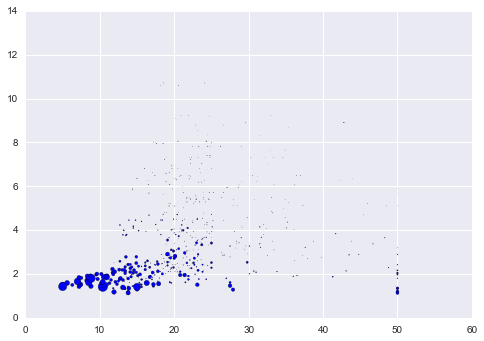

In [91]:
plt.scatter(boston.medv, boston.dis, s=boston.crim)
plt.show() # Need to run this order to see the plot.  Note that it will appear in the notebook.

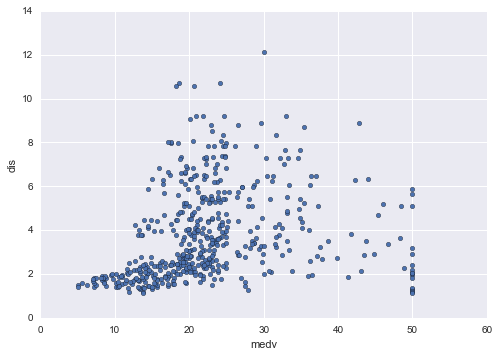

In [93]:
boston.plot(kind='scatter',x='medv',y='dis') # You can also use the .plot method to create plots.

Next, we create a boxplot and histogram of the of the median values of owner-occupied homes (in $1000s)

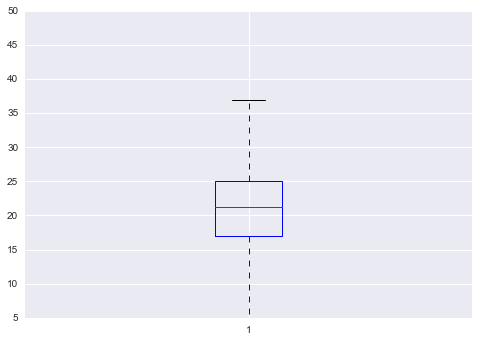

In [94]:
plt.boxplot(boston.medv) 
plt.show()

In [ ]:
?plt.boxplot

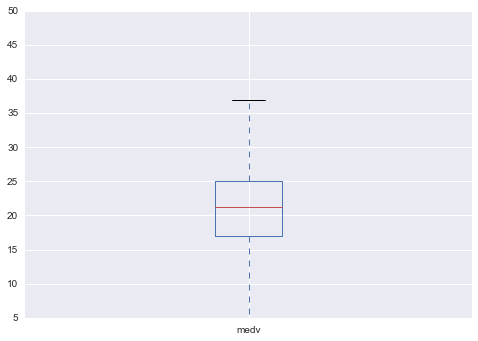

In [95]:
boston.medv.plot(kind='box') # Here, using the .plot syntax instead of the plt.boxplot used above.

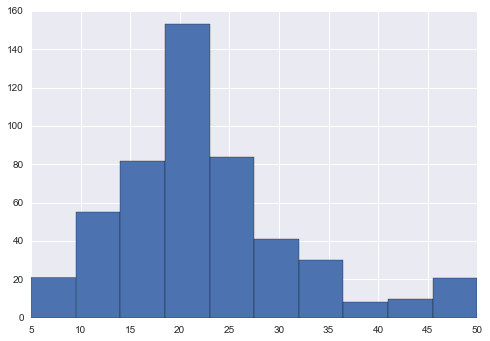

In [96]:
plt.hist(boston.medv)
plt.show()

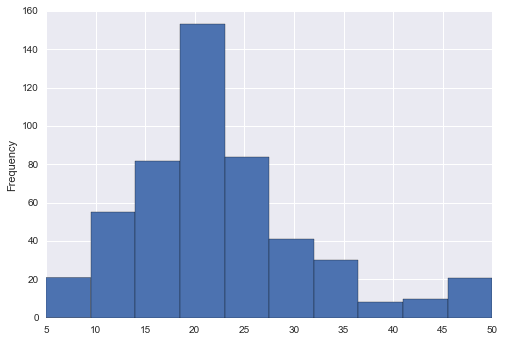

In [97]:
boston.medv.plot(kind='hist') # Using the .plot syntax.

We can also create a figure with multiple subplots.  One way is to do it manually (see documentation below). However, in some cases, we can just pass the columns you want to plot all at once to get the final figure.

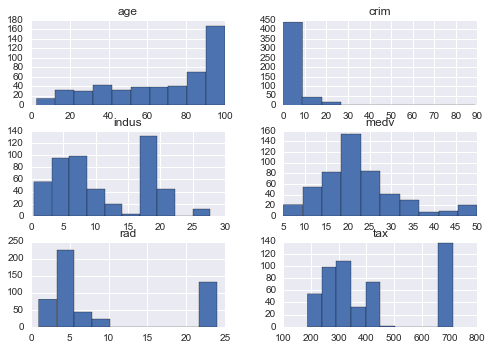

In [98]:
axes = boston[["crim", "indus", "age", "rad", "tax", "medv"]].hist()

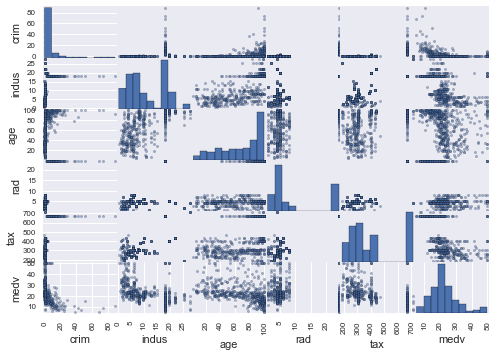

In [99]:
axes = pd.tools.plotting.scatter_matrix(boston[["crim", "indus", "age", "rad", "tax", "medv"]])

See [http://pandas.pydata.org/pandas-docs/version/0.18.0/visualization.html](http://pandas.pydata.org/pandas-docs/version/0.18.0/visualization.html) for more info on plotting in pandas. LOTS of options.

# Saving Notebooks to HTML

**You can also use File => Download As from the ipython notebook menu.**

```jupyter nbconvert --help```

```jupyter nbconvert lecture_1_py_jupyter_intro.ipynb```

```jupyter nbconvert --to html lecture_1_py_jupyter_intro.ipynb```

```jupyter nbconvert --to python lecture_1_py_jupyter_intro.ipynb```

```jupyter nbconvert --to latex --post PDF lecture_1_py_jupyter_intro.ipynb``` 

Note: Going to PDF probably won't work unless you install LaTeX, which is typically used for math typesetting.

# More Resources

Many Python tutorials in the form of downloadable Jupyter notebooks.
Covers basic Python, NumPy, Pandas, and many other topics: [https://github.com/addfor/tutorials](https://github.com/addfor/tutorials)

Good walkthrough of basic Pandas functionality: [http://synesthesiam.com/posts/an-introduction-to-pandas.html](http://synesthesiam.com/posts/an-introduction-to-pandas.html)

Another walkthrough of Pandas functionality: [http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/)

A Pandas-focused walkthrough using a Kaggle project as an example: [https://github.com/savarin/pyconuk-introtutorial](https://github.com/savarin/pyconuk-introtutorial)

Ten minute overview of what Pandas can do: [https://vimeo.com/59324550](https://vimeo.com/59324550)